In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import OrderedDict
from matplotlib.colors import ListedColormap

In [31]:
df = pd.read_csv('2009.csv')
#df.head()

In [32]:
parties = df['PARTY'].unique()
index = np.where(parties == 'IND')
parties = np.delete(parties,index)

In [33]:
parties_age = {}
for i in parties:
    temp = df[df['PARTY'] == i]
    cand = temp['CANDIDATE'].unique()
    arr = []
    for j in cand:
        t1 = temp[temp['CANDIDATE'] == j]
        age = t1['AGE'][t1.index[0]]
        arr.append(age)
    parties_age[i] = arr

In [34]:
party_candidates = {}
for i in parties_age.keys():
    l = len(parties_age[i])
    party_candidates[i] = l
party_candidates = {k: v for k, v in sorted(party_candidates.items(), key=lambda item: item[1])}

In [35]:
ordered = OrderedDict(party_candidates)
top5 = []
for i in range(5):
    res = ordered.popitem()
    top5.append(res[0])
#top5

In [36]:
k = 1
w = 0
age_index = {}
for i in range(25,65):
    w += 1
    age_index[i] = k
    if w == 10:
        w = 0
        k += 1

In [37]:
def rangeCount(party,arr,age_index):
    data = [party,0,0,0,0,0]
    for i in arr:
        if i >= 65:
            data[5] += 1
        else:
            data[age_index[i]] += 1
    return data

In [38]:
data = []
for i in top5:
    party = i
    arr = parties_age[party]
    data.append(rangeCount(party,arr,age_index))

In [39]:
df2 = pd.DataFrame(columns=["Party","25-35", "35-45","45-55","55-65","65+",], 
                  data = data)

In [40]:
#df2.head()

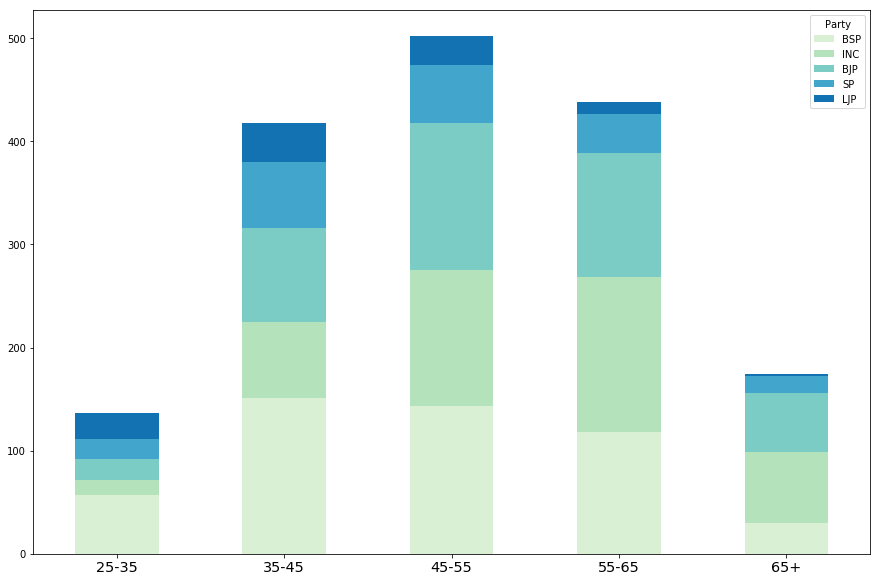

In [41]:
chart = df2.set_index('Party')\
  .reindex(df2.set_index('Party').sum().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 5)), 
          figsize=(15,10))
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=0,fontsize='x-large')